# Рубежный контроль №1

## Усков Д.Ю. Группа ИУ5-63Б

### Вариант 22

**Задача**. Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

**Дополнительное требование:** для произвольной колонки данных построить график "Ящик с усами (boxplot)".

**Набор данных:** https://www.kaggle.com/rhuebner/human-resources-data-set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# загрузка набора данных
data = pd.read_csv('HRDataset_v14.csv', sep=",")
# размер набора данных
data.shape

(311, 36)

In [3]:
# первые 5 строк набора данных
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## Масштабирование данных:
Для решения этой задачи я буду использовать MinMax масштабирование.

Например, произведем масштабирование признака "Salary":

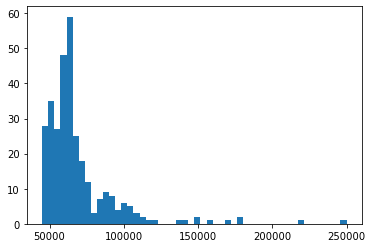

In [4]:
# гистограмма распределения данного признака
plt.hist(data['Salary'], 50)
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
# MinMax масштабирование
mms = MinMaxScaler()
sc_data = mms.fit_transform(data[['Salary']])

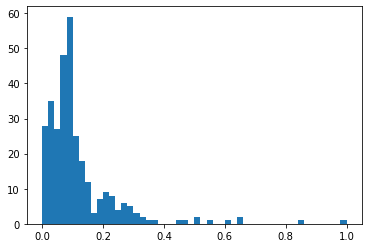

In [7]:
# гистограмма распределения после MinMax масгтабирования данного признака
plt.hist(sc_data, 50)
plt.show()

## Преобразование категориальных признаков в количественные:
### One-hot encoding:

Например, выполним преобразование для категориального признака "RecruitmentSource":

In [8]:
# one-hot encoding
pd.get_dummies(data['RecruitmentSource']).head()

,CareerBuilder,Diversity Job Fair,Employee Referral,Google Search,Indeed,LinkedIn,On-line Web application,Other,Website
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0


### Label encoding:

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# исходные уникальные значения данного признака
data['RecruitmentSource'].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

In [11]:
# label encoding
le = LabelEncoder()
data_le = le.fit_transform(data['RecruitmentSource'])

In [12]:
# уникальные значения после label encoding
np.unique(data_le)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [13]:
# обратное преобразование
le.inverse_transform(data_le)

array(['LinkedIn', 'Indeed', 'LinkedIn', 'Indeed', 'Google Search',
       'LinkedIn', 'LinkedIn', 'Employee Referral', 'Diversity Job Fair',
       'Indeed', 'Diversity Job Fair', 'Diversity Job Fair',
       'Diversity Job Fair', 'Google Search', 'On-line Web application',
       'Google Search', 'Employee Referral', 'Google Search',
       'Google Search', 'LinkedIn', 'Google Search', 'Indeed', 'Indeed',
       'CareerBuilder', 'Google Search', 'LinkedIn', 'Diversity Job Fair',
       'Indeed', 'Google Search', 'Diversity Job Fair', 'Google Search',
       'Diversity Job Fair', 'Google Search', 'Employee Referral',
       'Indeed', 'Google Search', 'Indeed', 'Indeed', 'LinkedIn',
       'LinkedIn', 'Indeed', 'Google Search', 'Indeed', 'Indeed',
       'LinkedIn', 'Employee Referral', 'Indeed', 'Indeed', 'Indeed',
       'Google Search', 'Indeed', 'Employee Referral',
       'Employee Referral', 'LinkedIn', 'CareerBuilder', 'Indeed',
       'Indeed', 'Indeed', 'LinkedIn', 'Employee R

## Построение графика "Ящик с усами (boxplot)":
Отображает одномерное распределение вероятности. Построение графика для колонки данных "EngagementSurvey".

<AxesSubplot:xlabel='EngagementSurvey'>

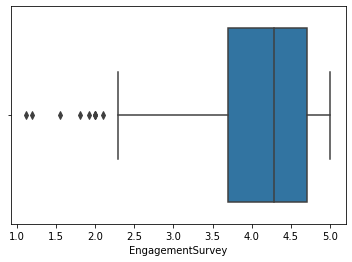

In [16]:
#по горизонтали
sns.boxplot(x=data['EngagementSurvey'])

<AxesSubplot:ylabel='EngagementSurvey'>

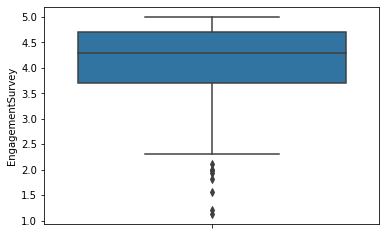

In [17]:
# по вертикали
sns.boxplot(y=data['EngagementSurvey'])